# 性格特性と心象の関係

In [8]:
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
import os 
import glob
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

In [11]:
with open('../../data/Hazumi1911/Hazumi1911_features/Hazumi1911_features.pkl', mode='rb') as f:
    videoIDs, videoSentiment, videoPersona, videoThirdPersona, videoText, videoAudio,\
    videoVisual, videoSentence, Vid = pickle.load(f, encoding='utf-8')

In [13]:
# ユーザごとにクラス数を集計
negative = []
neutral = [] 
positive = []
for user, labels in videoSentiment.items():
    neg = 0
    neu = 0 
    pos = 0
    for label in labels:
        if label == 0.0:
            neg += 1
        elif label == 1.0:
            neu += 1
        else:
            pos += 1
    negative.append(neg)
    neutral.append(neu)
    positive.append(pos)

# ユーザごとの性格特性をリスト化
extraversion = []
agreauleness = []
conscientiousness = []
neuroticism = []
openness = []

for user, labels in videoThirdPersona.items():
    extraversion.append(labels[0])
    agreauleness.append(labels[1])
    conscientiousness.append(labels[2])
    neuroticism.append(labels[3])
    openness.append(labels[4])

In [10]:
low = [] 
for neg, neu in zip(negative, neutral):
    low.append(neg + neu)

print(low)

[25, 54, 34, 36, 37, 41, 57, 37, 42, 53, 36, 31, 27, 44, 47, 38, 32, 53, 54, 52, 24, 36, 17, 50, 60, 42]


In [32]:
# for文を使い科目の組み合わせで計算実行
def calc_p(df):        
    for i in range(5):
        x = df.iloc[:, 0].values 
        y = df.iloc[:, i+1].values 
        a, b = pearsonr(np.ravel(x), np.ravel(y))
        print("=" * 45)
        print(f"--{i}--")
        print("相関係数:", a.round(4))
        print("p値:", b.round(4))

In [34]:
# 低群と性格特性の相関
df1 = pd.DataFrame({"negative":negative,
                   "extraversion":extraversion,
                   "agreauleness":agreauleness,
                   "conscientiousness":conscientiousness,
                   "neuroticism":neuroticism,
                   "openness":openness})
print('----negative----')
print(df1.corr()['negative'])
calc_p(df1)

# 中群と性格特性の相関
df2 = pd.DataFrame({"neutral":neutral,
                   "extraversion":extraversion,
                   "agreauleness":agreauleness,
                   "conscientiousness":conscientiousness,
                   "neuroticism":neuroticism,
                   "openness":openness})
print('----neutral----')
print(df2.corr()['neutral'])
calc_p(df2)

# 高群と性格特性の相関
df3 = pd.DataFrame({"positive":positive,
                   "extraversion":extraversion,
                   "agreauleness":agreauleness,
                   "conscientiousness":conscientiousness,
                   "neuroticism":neuroticism,
                   "openness":openness})
print('----positive----')
print(df3.corr()['positive'])
calc_p(df3)

# 低郡+中群と性格特性の相関
# df4 = pd.DataFrame({"low":low,
#                    "extraversion":extraversion,
#                    "agreauleness":agreauleness,
#                    "conscientiousness":conscientiousness,
#                    "neuroticism":neuroticism,
#                    "openness":openness})
# print('----low---')
# print(df4.corr()['low'])

----negative----
negative             1.000000
extraversion        -0.232801
agreauleness        -0.444970
conscientiousness   -0.295349
neuroticism          0.201431
openness            -0.585364
Name: negative, dtype: float64
--0--
相関係数: -0.2328
p値: 0.2524
--1--
相関係数: -0.445
p値: 0.0227
--2--
相関係数: -0.2953
p値: 0.143
--3--
相関係数: 0.2014
p値: 0.3238
--4--
相関係数: -0.5854
p値: 0.0017
----neutral----
neutral              1.000000
extraversion        -0.088721
agreauleness        -0.320949
conscientiousness   -0.218734
neuroticism         -0.071741
openness            -0.272107
Name: neutral, dtype: float64
--0--
相関係数: -0.0887
p値: 0.6665
--1--
相関係数: -0.3209
p値: 0.1099
--2--
相関係数: -0.2187
p値: 0.283
--3--
相関係数: -0.0717
p値: 0.7276
--4--
相関係数: -0.2721
p値: 0.1787
----positive----
positive             1.000000
extraversion         0.382397
agreauleness        -0.148805
conscientiousness    0.072122
neuroticism         -0.215429
openness             0.199224
Name: positive, dtype: float64
--0--
相関係数: 

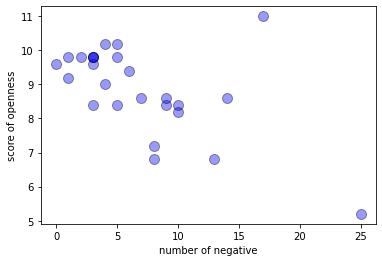

In [30]:
# グラフ可視化
plt.scatter(
            df1["negative"],          # X軸値
            df1["openness"],    # Y軸値
            marker = "o",           # マーカー形状
            s = 100,                # プロットサイズ
            c = "blue",             # カラー
            edgecolor = "black",    # 枠線カラー
            linewidth = 1,          # 線の太さ
            alpha = 0.4,            # 透明度
            )

# 書式設定
plt.xlabel("number of negative")               # X軸ラベル
plt.ylabel("score of openness")        # Y軸ラベル
plt.show()